In [1]:
from torchmetrics.audio import SignalNoiseRatio as SNR
from torchmetrics.audio import SignalDistortionRatio as SDR
from torchmetrics.audio import ScaleInvariantSignalDistortionRatio as SI_SDR
from Dataloader.Dataloader import EarsDataset
from tqdm import tqdm
import os
from matplotlib import pyplot as plt
import numpy as np

# blackhole_path = os.getenv('BLACKHOLE')
# if not blackhole_path:
#     raise EnvironmentError("The environment variable $BLACKHOLE is not set.")

path = r"C:\Users\alexa\Documents\Github\DL-CausalSpeechProject\Accuracy Metrics"
dataset_VAL = EarsDataset(data_dir=path, subset = 'valid', normalize = False)

si_sdr_scores = []
sdr_scores = []
snr_scores = []

si_sdr_scores_denoised = []
sdr_scores_denoised = []
snr_scores_denoised = []

for i in tqdm(range(len(dataset_VAL))):
    noisy, clean = dataset_VAL[i]
    
    if noisy.dim() > 1: noisy = noisy.squeeze()
    if clean.dim() > 1: clean = clean.squeeze()
    
    si_sdr = SI_SDR()(noisy, clean)
    si_sdr_scores.append(si_sdr.item())
    sdr = SDR()(noisy, clean)
    sdr_scores.append(sdr.item())
    snr = SNR()(noisy, clean)
    snr_scores.append(snr.item())
    
    # denoised = model(noisy)
    
    # si_sdr = SI_SDR()(denoised, clean)
    # si_sdr_scores_denoised.append(si_sdr.item())
    # sdr = SDR()(denoised, clean)
    # sdr_scores_denoised.append(sdr.item())
    # snr = SNR()(denoised, clean)
    # snr_scores_denoised.append(snr.item())

si_sdr_scores = np.asarray(si_sdr_scores)
sdr_scores = np.asarray(sdr_scores)
snr_scores = np.asarray(snr_scores)

si_sdr_scores_denoised = np.asarray(si_sdr_scores_denoised)
sdr_scores_denoised = np.asarray(sdr_scores_denoised)
snr_scores_denoised = np.asarray(snr_scores_denoised)

100%|██████████| 632/632 [00:20<00:00, 31.54it/s]


SI-SNR

SDR

Det er også en god ide at rapportere metrikker som improvements - hvis man beregner e.g. SI-SDR mellem noisy speech (netværkets input) og clean speech på hele test sættet vil man få en non-zero SI-SDR som kan tænkes som værende dit performance floor (hvad er SI-SDR hvis man ingen processing har, men bare outputter input direkte?). Så kan man rapportere SI-SDRi (SI-SDR improvement) som forskellen på SI-SDR floor og den gennemsnitlige SI-SDR man får ved at bruge netværket til at processere input.

(100.0, 200.0)

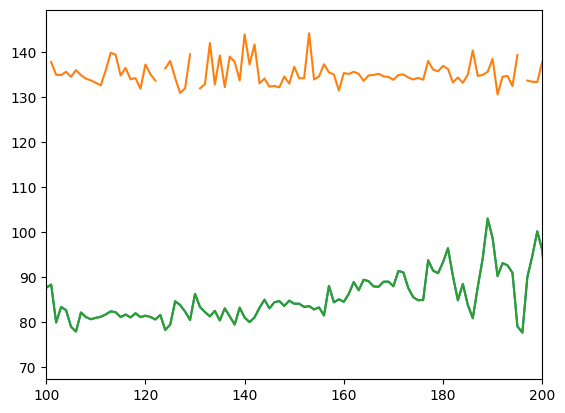

In [ ]:
import numpy as np
# plt.plot(abs(np.asarray(si_sdr_scores) - np.asarray(sdr_scores)))
plt.plot(si_sdr_scores)
plt.plot(sdr_scores)
plt.plot(snr_scores);
# set ylims
plt.xlim(100, 200)